In [ ]:
import torch
from torch import nn
import logging
import yaml
import os
from os.path import join
import xarray as xr

from credit.data import get_forward_data
from glob import glob
import xarray as xr
import numpy as np
import imageio
import matplotlib.pyplot as plt



In [ ]:


debug_folder = "/glade/work/dkimpara/CREDIT_runs/ensemble_skebs/debug_pattern"
all_files = sorted(glob(join(debug_folder, 'iter_*')))

In [45]:
patterns = []
for file in all_files:
    patterns.append(torch.load(file).cpu().detach().numpy())

all_patterns = np.stack(patterns)

/glade/derecho/scratch/dkimpara/tmp/ipykernel_32872/1126291147.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  patterns.append(torch.load(file).cpu().detach().numpy())


In [46]:
all_patterns.shape

(10, 192, 288)

In [47]:
da = xr.DataArray(all_patterns)
min = da.min()
max = da.max()
contours = np.linspace(min, max, 5)

/glade/derecho/scratch/dkimpara/tmp/ipykernel_32872/1667486986.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(join(debug_folder, filename))
/glade/derecho/scratch/dkimpara/tmp/ipykernel_32872/1667486986.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(join(debug_folder, filename))


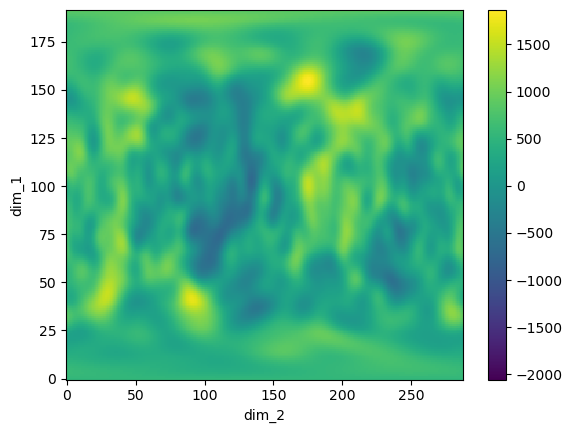

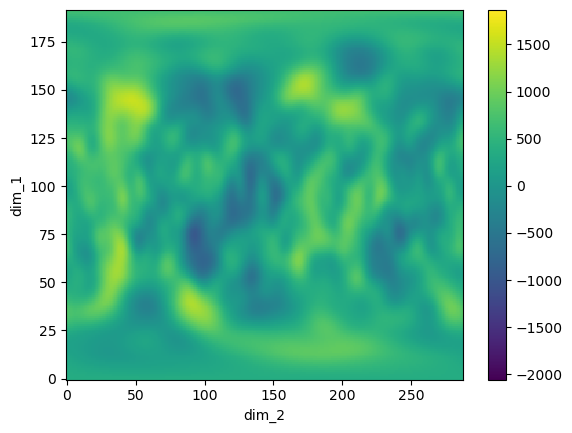

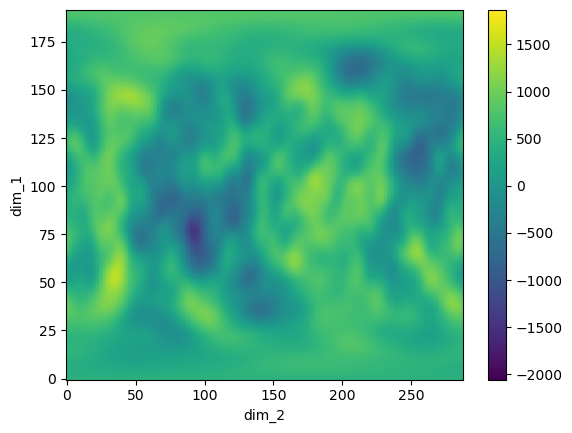

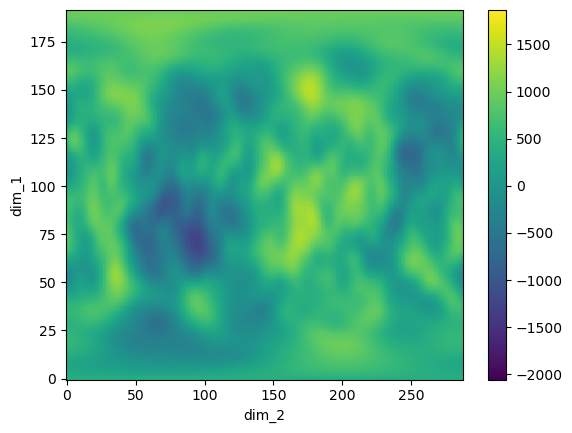

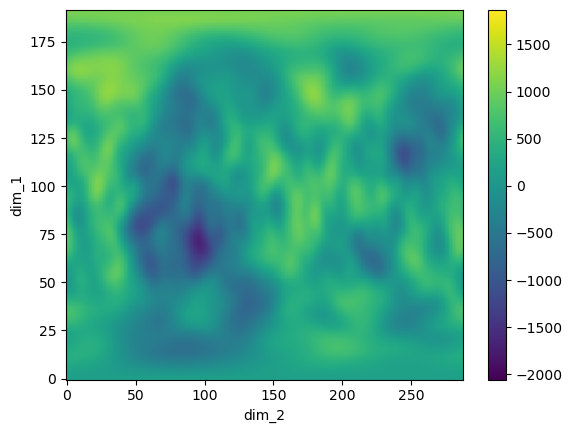

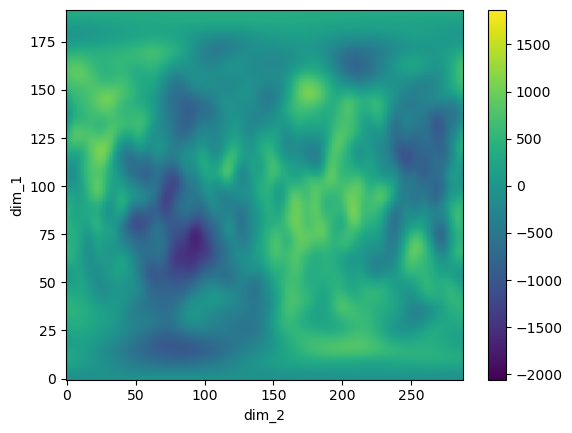

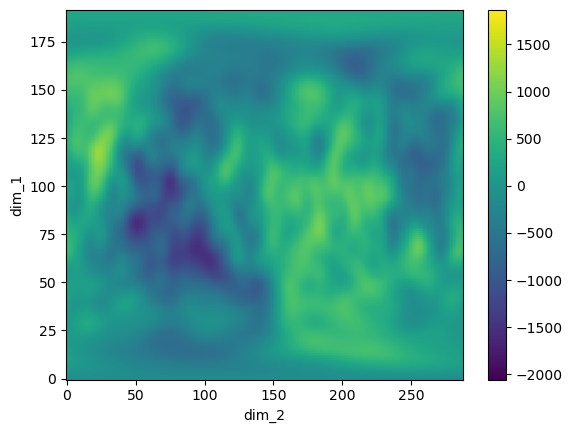

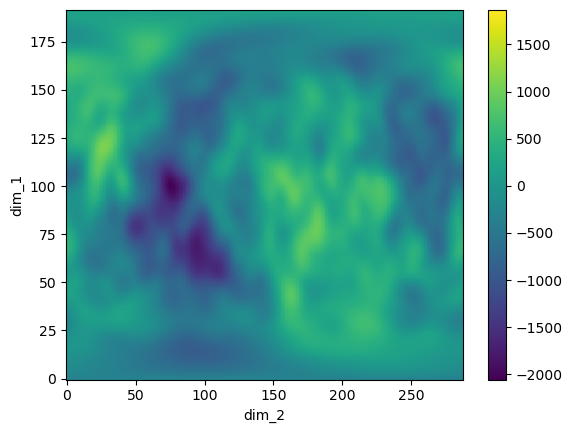

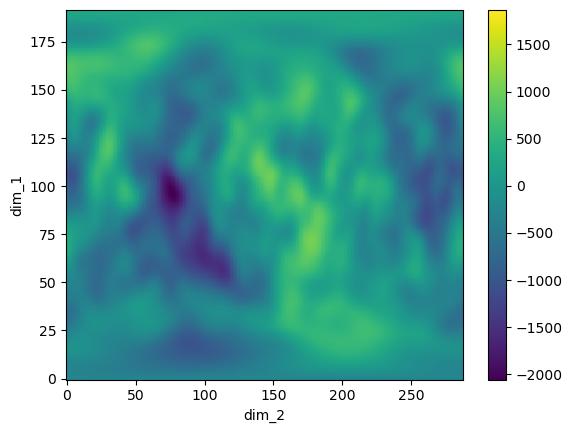

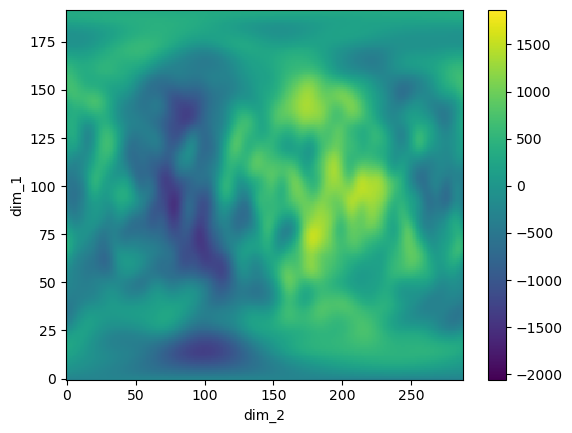

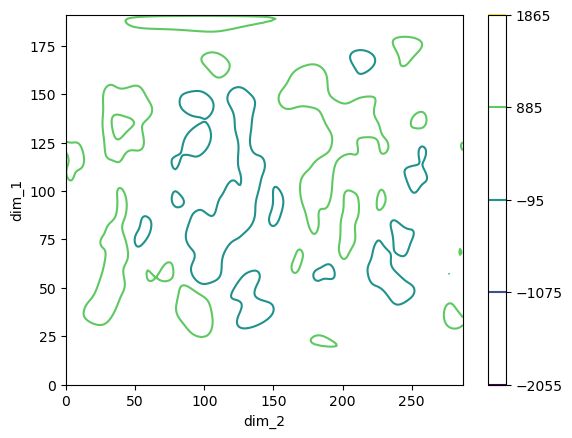

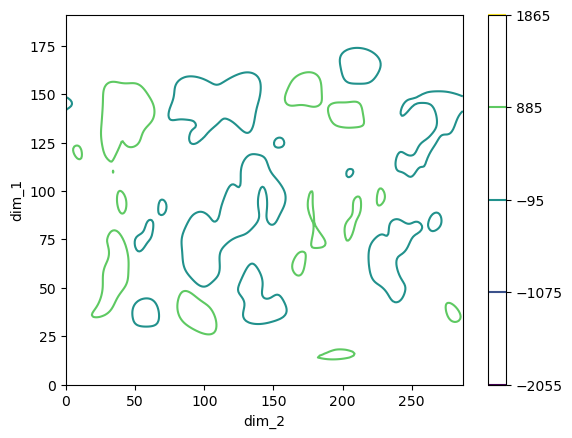

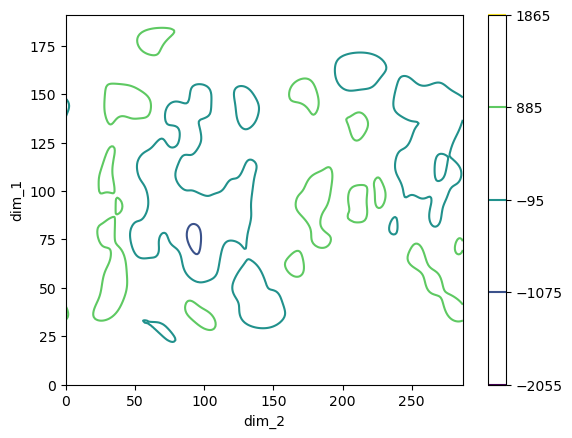

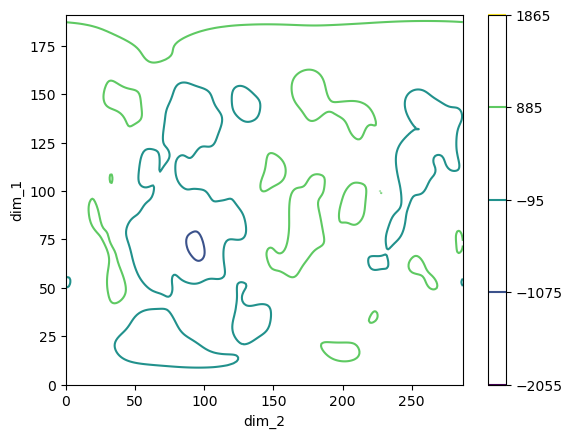

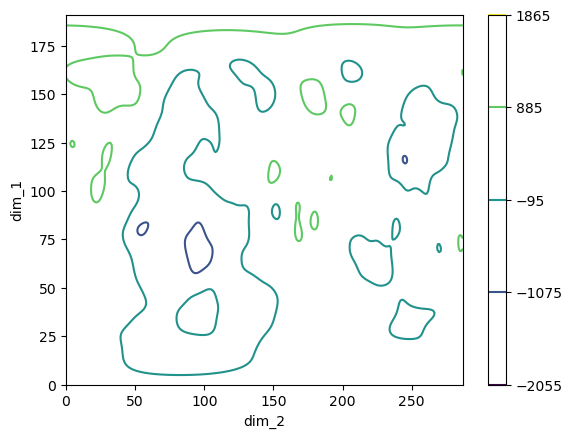

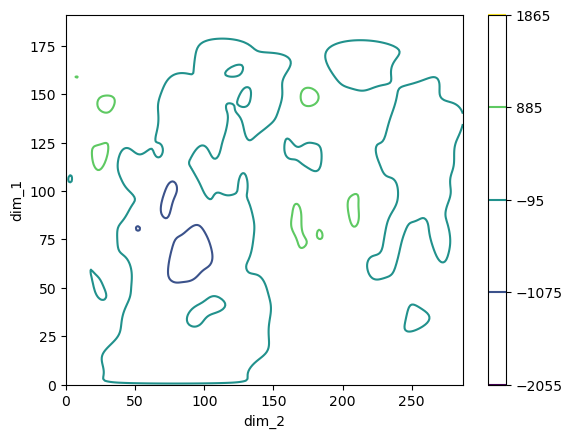

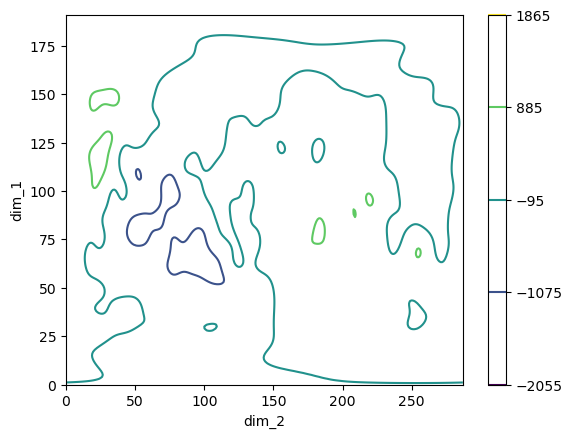

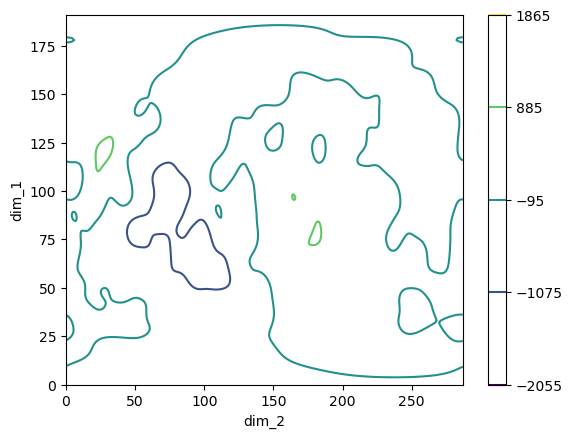

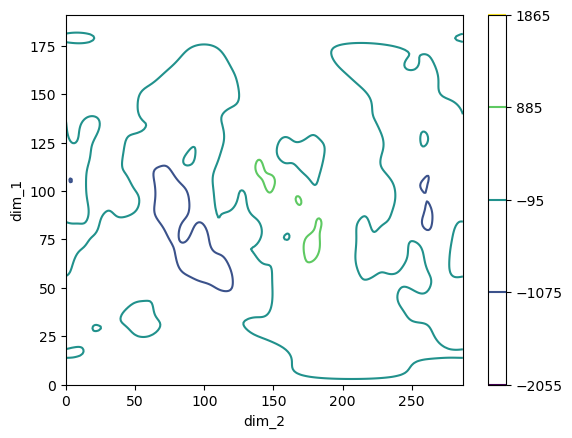

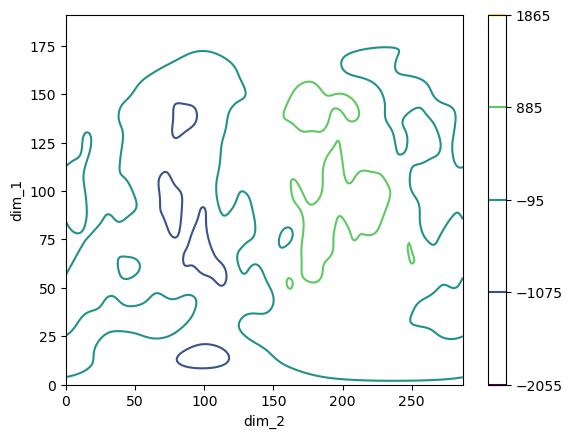

In [48]:
for i in range(len(da)):
    plt.figure()
    da[i].plot(vmin=min, vmax=max)
    plt.savefig(join(debug_folder, f'frame_{i}.png'))

for i in range(len(da)):
    plt.figure()
    xr.plot.contour(da[i], levels=contours, vmin=min, vmax=max, add_colorbar=True)
    plt.savefig(join(debug_folder, f'frame_{i}_contour.png'))

with imageio.get_writer(join(debug_folder, 'pattern.gif'), mode='I', fps=2) as writer:
    for i in range(len(da)):
        filename = f'frame_{i}.png'
        image = imageio.imread(join(debug_folder, filename))
        writer.append_data(image)

with imageio.get_writer(join(debug_folder, 'pattern_contour.gif'), mode='I', fps=2) as writer:
    for i in range(len(da)):
        filename = f'frame_{i}_contour.png'
        image = imageio.imread(join(debug_folder, filename))
        writer.append_data(image)